In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Reading in data
mitbih_train_df = pd.read_csv("../data/mitbih/mitbih_train.csv", header=None)
mitbih_test_df = pd.read_csv("../data/mitbih/mitbih_test.csv", header=None)

In [4]:
mitbih_train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
mitbih_test_df.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Looking at data distribution

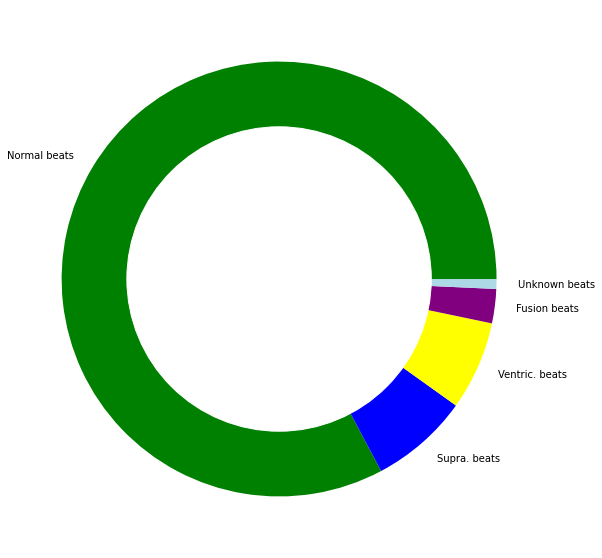

In [7]:
mitbih_train_df[187] = mitbih_train_df[187].astype(int)
count = mitbih_train_df[187].value_counts()

plt.figure(figsize=(10, 10))
pie = plt.Circle((0, 0), 0.7, color="white")
plt.pie(count, labels=["Normal beats", "Supra. beats", "Ventric. beats", "Fusion beats", "Unknown beats"], colors=["green", "blue", "yellow", "purple", "lightblue"])
p = plt.gcf()
p.gca().add_artist(pie)
plt.show()

## Looking at the different classes

In [12]:
samples = mitbih_train_df.groupby(187, group_keys=False).apply(lambda mitbih_train_df: mitbih_train_df.sample(1))
samples

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
2900,0.915074,0.917197,0.380042,0.000000,0.046709,0.101911,0.101911,0.089172,0.087049,0.076433,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
74019,1.000000,0.797153,0.153025,0.000000,0.092527,0.117438,0.131673,0.224199,0.238434,0.188612,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
75730,1.000000,0.937046,0.679177,0.348668,0.125908,0.127119,0.131961,0.089588,0.076271,0.075061,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
81108,1.000000,0.913907,0.656954,0.366887,0.157616,0.121854,0.128477,0.105960,0.084768,0.071523,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
84776,0.703448,0.582759,0.531034,0.517241,0.455172,0.424138,0.351724,0.306897,0.141379,0.086207,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


Text(0.5, 1.0, 'Unknown beats')

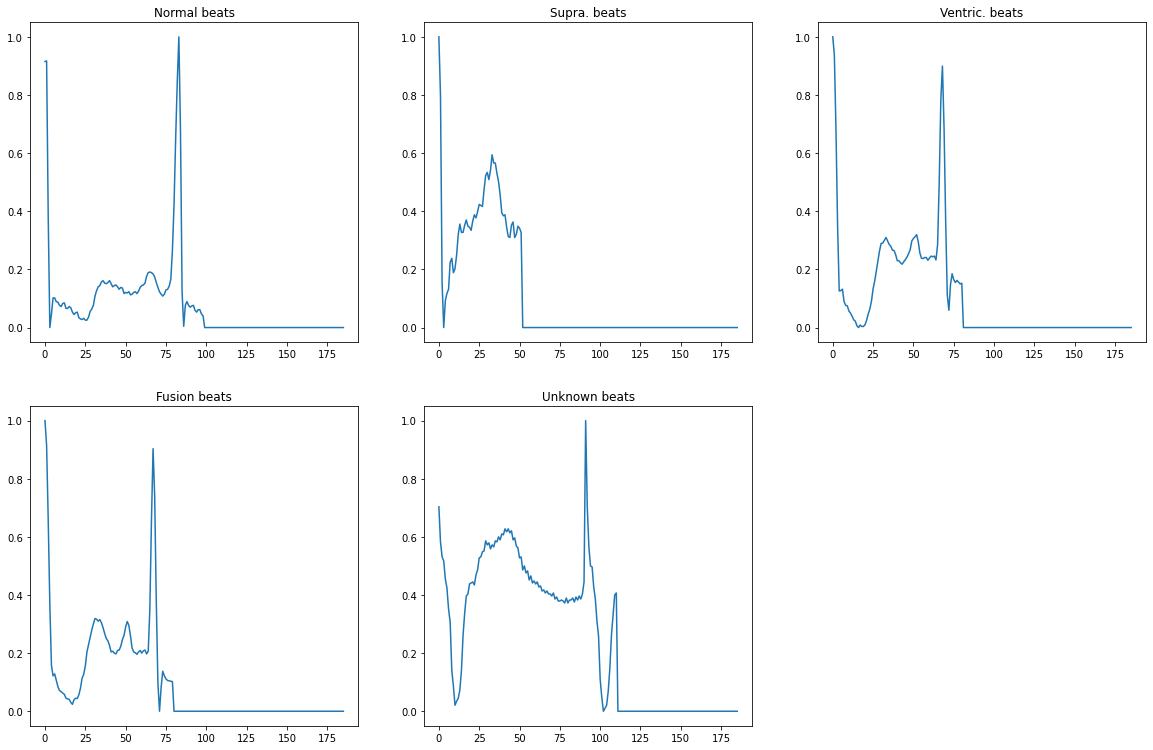

In [15]:
plt.figure(figsize=(20, 20))
plt.subplot(3,3,1)
plt.plot(samples.iloc[0,:186])
plt.title('Normal beats')
plt.subplot(3,3,2)
plt.plot(samples.iloc[1,:186])
plt.title('Supra. beats')
plt.subplot(3,3,3)
plt.plot(samples.iloc[2,:186])
plt.title('Ventric. beats')
plt.subplot(3,3,4)
plt.plot(samples.iloc[3,:186])
plt.title('Fusion beats')
plt.subplot(3,3,5)
plt.plot(samples.iloc[4,:186])
plt.title('Unknown beats')


In [16]:
print('hello')

hello
